## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("train_data.csv")
data_val=pd.read_csv("valid_data.csv")

In [3]:
print(data.shape)
print(data_val.shape)
data.head()

(534, 2)
(229, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [4]:
data_val.head()

,Date,count
0,2014-02-09,196
1,2014-02-10,299
2,2014-02-11,224
3,2014-02-12,216
4,2014-02-13,212


# Required Preprocessing 

In [5]:
data["Date"] = pd.to_datetime(data['Date'],format='%Y-%m-%d')


In [6]:
data.head()

,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [7]:
data_val["Date"] = pd.to_datetime(data_val['Date'],format='%Y-%m-%d')

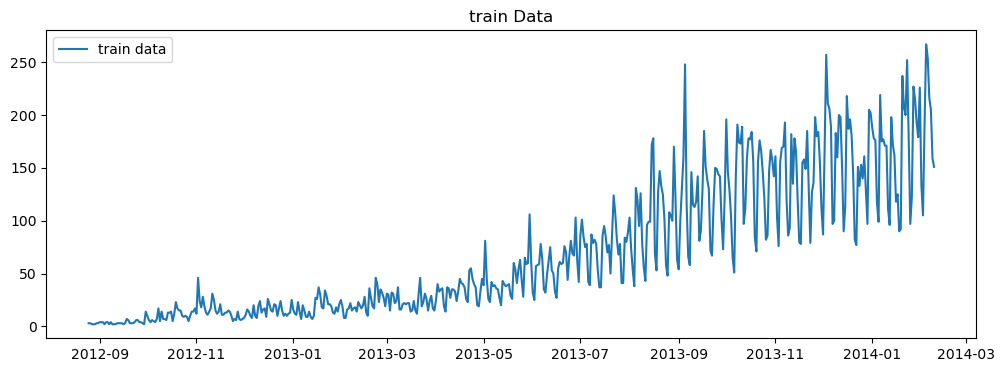

In [8]:
plt.figure(figsize=(12,4))

plt.plot(data["Date"], data['count'], label='train data')
plt.legend(loc='best')
plt.title("train Data")
plt.show()

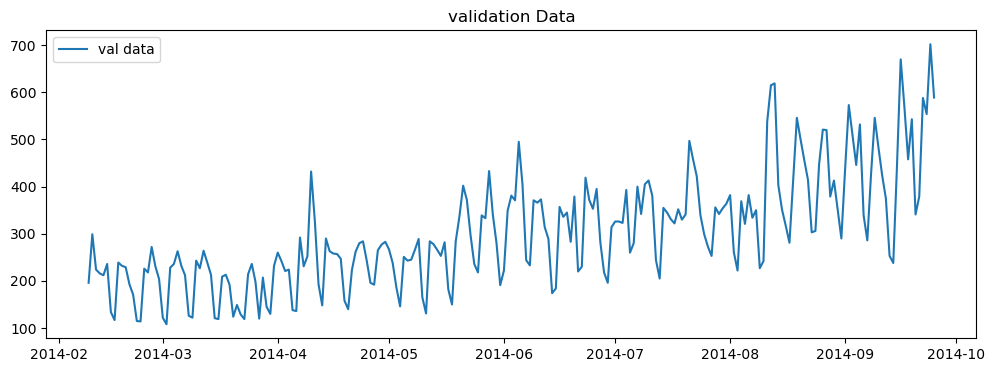

In [9]:
plt.figure(figsize=(12,4))

plt.plot(data_val["Date"], data_val['count'], label='val data')
plt.legend(loc='best')
plt.title("validation Data")
plt.show()

# Hold-out Validation

In [10]:
train_data = data[:400]
valid_data = data[401:]

In [11]:
print(train_data.shape), print(valid_data.shape)

(400, 2)
(133, 2)


(None, None)

In [12]:
train_data.tail()

,Date,count
395,2013-09-24,150
396,2013-09-25,149
397,2013-09-26,144
398,2013-09-27,142
399,2013-09-28,101


In [13]:
valid_data.head()

,Date,count
401,2013-09-30,123
402,2013-10-01,196
403,2013-10-02,146
404,2013-10-03,129
405,2013-10-04,104


In [14]:
valid_data.tail()

,Date,count
529,2014-02-05,254
530,2014-02-06,216
531,2014-02-07,205
532,2014-02-08,159
533,2014-02-09,151


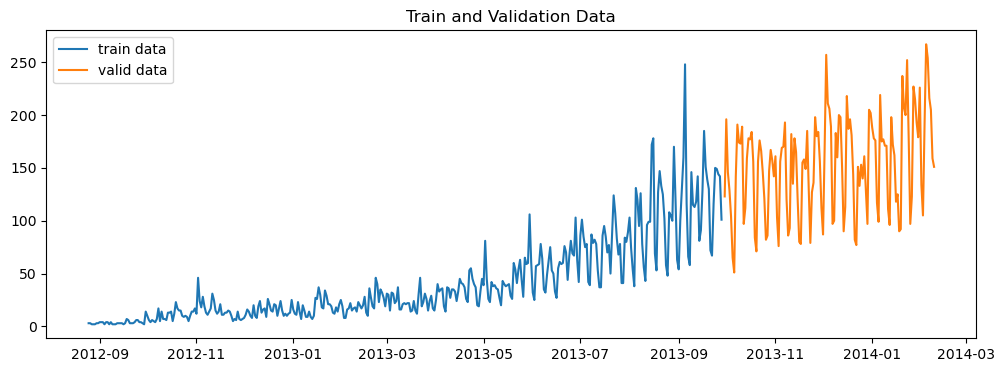

In [15]:
plt.figure(figsize=(12,4))

plt.plot(train_data["Date"], train_data['count'], label='train data')
plt.plot(valid_data["Date"], valid_data['count'], label='valid data')

plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Time Series Cross Validation

In [16]:
from sklearn.model_selection import TimeSeriesSplit

In [17]:
time_series_cv = TimeSeriesSplit(n_splits=5)
print(time_series_cv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [18]:
for train_index, val_index in time_series_cv.split(data):
    print('----- ----- ----')
    print("TRAIN:", train_index[0], 'to', train_index[-1])
    print("VALIDATION:", val_index[0], 'to', val_index[-1])

----- ----- ----
TRAIN: 0 to 88
VALIDATION: 89 to 177
----- ----- ----
TRAIN: 0 to 177
VALIDATION: 178 to 266
----- ----- ----
TRAIN: 0 to 266
VALIDATION: 267 to 355
----- ----- ----
TRAIN: 0 to 355
VALIDATION: 356 to 444
----- ----- ----
TRAIN: 0 to 444
VALIDATION: 445 to 533


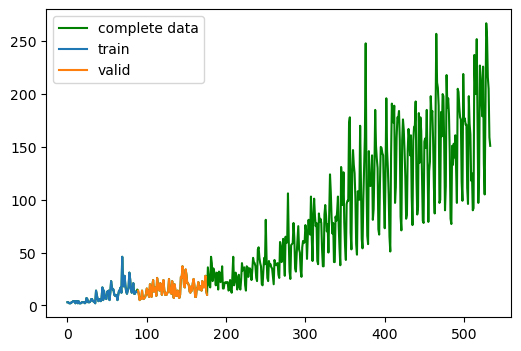

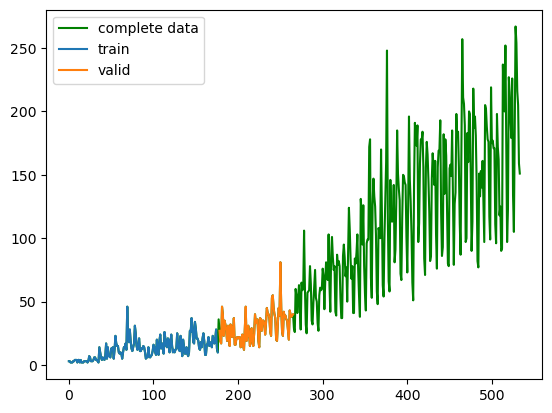

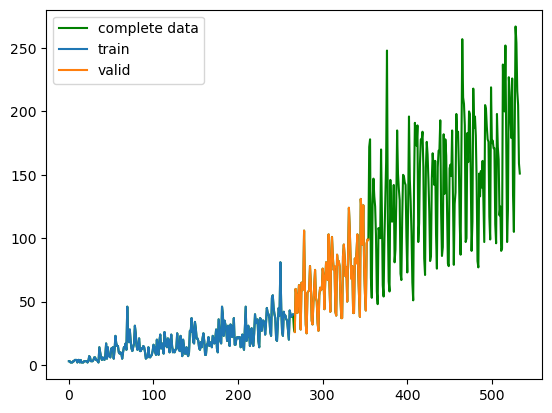

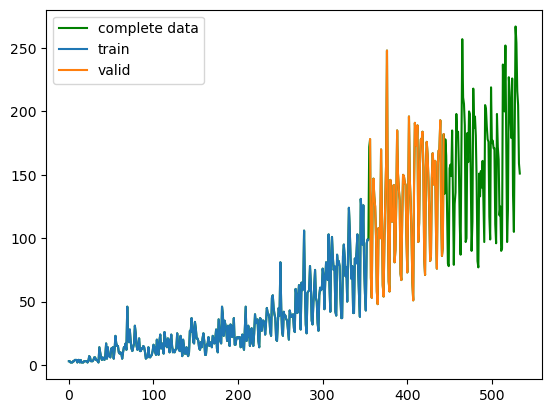

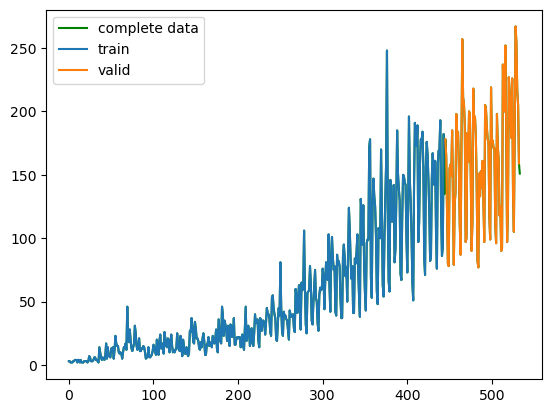

In [19]:
plt.figure(figsize=(6,4))

for train_index, test_index in time_series_cv.split(data):
    plt.plot(data.index, data['count'], label='complete data', color='green')

    plt.plot(data[train_index[0]:train_index[-1]].index,data['count'][train_index[0]:train_index[-1]],label='train')
    plt.plot(data[test_index[0]:test_index[-1]].index,data['count'][test_index[0]:test_index[-1]],label='valid')
    
    plt.legend(loc='best')
    plt.show()

# Walk Forward Cross Validation

In [20]:
for train_index, test_index in time_series_cv.split(data):
    print('----- ----- ----')
    print("TRAIN:", train_index[-1]-88, 'to', train_index[-1])
    print("TEST:", test_index[-1]-88, 'to', test_index[-1])

----- ----- ----
TRAIN: 0 to 88
TEST: 89 to 177
----- ----- ----
TRAIN: 89 to 177
TEST: 178 to 266
----- ----- ----
TRAIN: 178 to 266
TEST: 267 to 355
----- ----- ----
TRAIN: 267 to 355
TEST: 356 to 444
----- ----- ----
TRAIN: 356 to 444
TEST: 445 to 533


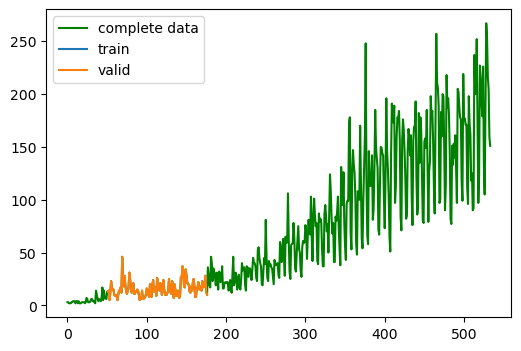

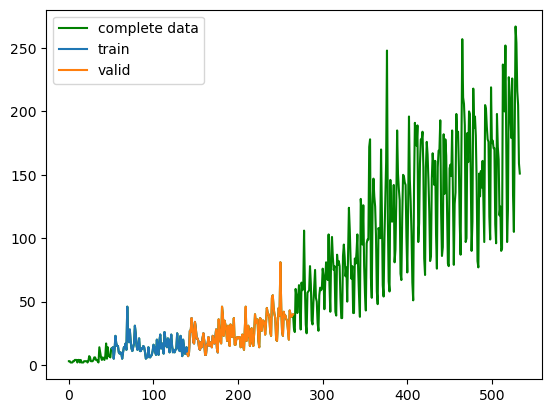

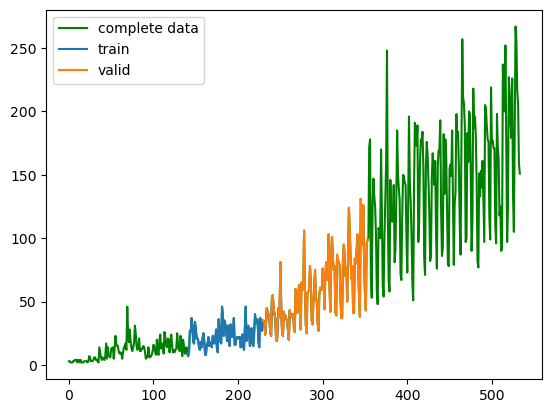

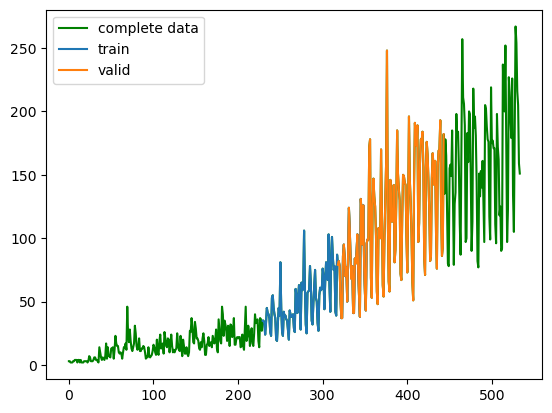

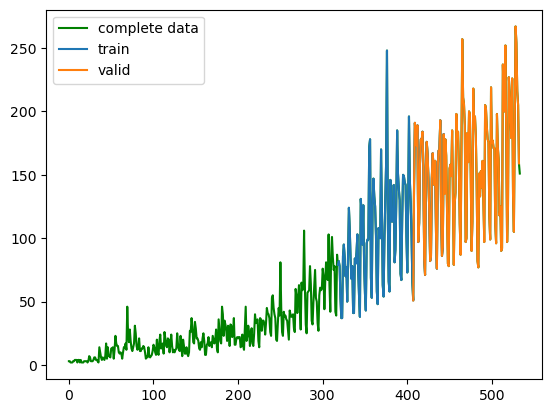

In [21]:
plt.figure(figsize=(6,4))

for train_index, test_index in time_series_cv.split(data):
    plt.plot(data.index, data['count'], label='complete data', color='green')

    plt.plot(data[(train_index[-1]-126):train_index[-1]].index,data['count'][train_index[-1]-126:train_index[-1]],label='train')
    plt.plot(data[(test_index[-1]-126):test_index[-1]].index,data['count'][test_index[-1]-126:test_index[-1]],label='valid')
    
    plt.legend(loc='best')
    plt.show()

# Walk-Forward Validation

In [22]:
pip install darts

     -------------------------------------- 934.2/934.2 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 613.3/613.3 kB 4.8 MB/s eta 0:00:00
     -------------------------------------- 250.7/250.7 kB 5.2 MB/s eta 0:00:00
     ------------------------------------- 165.8/165.8 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 44.0/44.0 kB 2.3 MB/s eta 0:00:00
     -------------------------------------- 101.7/101.7 kB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 5.0 MB/s eta 0:00:00
     -------------------------------------- 456.1/456.1 kB 5.7 MB/s eta 0:00:00
     -------------------------------------- 815.2/815.2 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 9.8/9.8 MB 8.7 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 10.4 MB/s eta 0:00:00
     ------------------

In [ ]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.dataprocessing.transformers import Scaler
from darts.utils.model_selection import backtest_forecasting

In [23]:


# Example time series
series = TimeSeries.from_dataframe(df, time_col="date", value_col="count")

# Model
model = ExponentialSmoothing()

# Walk-forward validation
results = backtest_forecasting(series, model, start=0.6, forecast_horizon=12)


NameError: name 'TimeSeries' is not defined